In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

In [6]:
#Load dataset
df = pd.read_csv('1001752757.csv')

In [8]:
# Perform Fisher's exact test and calculate p-values
p_values = []
for index, row in df.iterrows():
    contingency_table = [[row['Case_Num_C_Allele'], row['Case_Num_T_Allele']],
                         [row['Control_Num_C_Allele'], row['Control_Num_T_Allele']]]
    odds_ratio, p_value = fisher_exact(contingency_table)
    p_values.append(p_value)

In [9]:
# Bonferroni correction
num_tests = len(df)
effective_threshold = 5e-8 / num_tests

In [10]:
# Determine significant SNPs
significant = [p < effective_threshold for p in p_values]

In [11]:
# Update results.csv with p-values and significance
df['p-values'] = p_values
df['Significant'] = significant

In [12]:
# Calculate Bonferroni-corrected p-value and determine corrected significance
bonferroni_corrected = 5e-8
df['Bonferroni-corrected'] = [p < bonferroni_corrected for p in p_values]

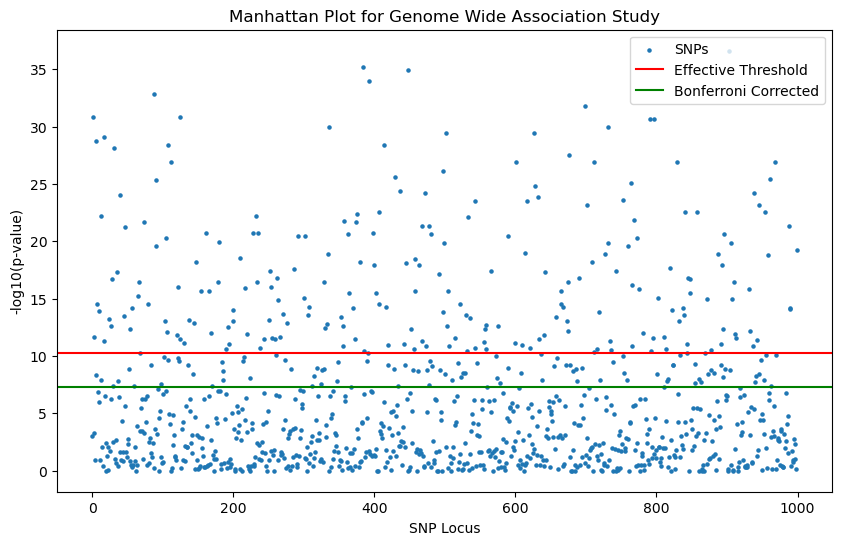

In [23]:
# Generate Manhattan plot
plt.figure(figsize=(10, 6))
# Plot -log10(p-values) on the y-axis
plt.scatter(range(num_tests), -np.log10(p_values), label='SNPs', s=5)
# Plot significance thresholds
plt.axhline(-np.log10(effective_threshold), color='r', linestyle='-', label='Effective Threshold')
plt.axhline(-np.log10(bonferroni_corrected), color='g', linestyle='-', label='Bonferroni Corrected')
# Add a legend
plt.legend()
plt.xlabel('SNP Locus')
plt.ylabel('-log10(p-value)')
plt.title('Manhattan Plot for Genome Wide Association Study')
plt.show()

In [14]:
# Save the updated results.csv
df.to_csv('results.csv', index=False)